# Tehtävä 1.
## Aihe: Uutisotsikon klassifiointi - Clickbait vai ei?
2,5 pistettä

Datasetti:
https://github.com/bhargaviparanjape/clickbait/tree/master/dataset

1. Lataa clickbait ja ei-clickbait otsikot clickbait_data.txt ja non_clickbait_data.txt tiedostoista data - kansiosta
2. Leimaa otsikot 0 tai 1 luokkaan (clickbait vai ei)
2. Jaa data koulutus- ja testidataan (80% koulutusdataa 20% testidataa jako)
4. Luo RNN - malli, joka ennustaa, onko otsikko clickbait vai ei
5. Tulosta mallin tarkkuus evaluate - funktiolla
6. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Käytä materiaaleista tuttua Tokenizer - luokkaa
* Luo otsikoista samanpituiset sekvenssit

In [ ]:
# Tehtävän toteutus

In [ ]:
# Tehtävän vastaukset. Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. Sijoita results - muuttujaan funktion model.evaluate() tulos.
# Muista määrittää model.compile() - funktioon seurattavaksi suureeksi metrics=['accuracy'], jotta näät, kuinka suuri osa neuroverkon ennustuksista on oikein.
print(f"Test Loss:{results[0]} Test Accuracy:{results[1]*100}%")

# Tehtävä 2.
### Aihe: Aikasarjaennustaminen - Lämpötila ja sähkönkulutus
2,5 pistettä

Data - kansiossa tiedostoissa 'lampotila_2010.csv' ja 'sahkonkulutus_2010.csv' on vuoden 2010 tammikuun lämpötila Jyväskylän lentoasemalta ja koko Suomen sähkönkulutus. Tavoitteena on luoda neuroverkkomalli, joka ennustaa sähkönkulutuksen ja lämpötilan avulla tulevaa sähkönkulutusta.

1. Ennusta 24 tunnin historiadatalla 24 tuntia eteenpäin
2. Kouluta neuroverkko vuoden 2010 tammikuun datalla.
3. Luo testidatasetti 'lampotila_2011.csv' ja 'sahkonkulutus_2011.csv' tiedostoista
4. Ennusta mallilla vuoden 2011 tammikuun sähkönkulutusta. Piirrä oikeat arvot ja ennustetut arvot viivakaavioon.
5. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Muuta aikasarja sekvenssimuotoon käyttäen multivariate_data - funktiota materiaaleista.
    * Mitkä ovat muuttujia, joiden avulla ennustetaan, ja mitkä ovat ennustettavia arvoja?
* Dataa on vähän, joten ennustustulokset saattavat olla huonoja
    * Tärkeintä on, että idea on oikein
    * Käytä Dropout - kerroksia ja vaihda LSTM - kerroksissa solujen määrää

Epoch 1/30
18/18 [==============================] - 3s 153ms/step - loss: 0.3869 - mse: 0.3869 - mae: 0.5845 - val_loss: 0.1770 - val_mse: 0.1770 - val_mae: 0.3837
Epoch 2/30
18/18 [==============================] - 2s 136ms/step - loss: 0.3752 - mse: 0.3752 - mae: 0.5742 - val_loss: 0.1683 - val_mse: 0.1683 - val_mae: 0.3715
Epoch 3/30
18/18 [==============================] - 2s 137ms/step - loss: 0.3598 - mse: 0.3598 - mae: 0.5598 - val_loss: 0.1555 - val_mse: 0.1555 - val_mae: 0.3528
Epoch 4/30
18/18 [==============================] - 2s 133ms/step - loss: 0.3326 - mse: 0.3326 - mae: 0.5312 - val_loss: 0.1313 - val_mse: 0.1313 - val_mae: 0.3137
Epoch 5/30
18/18 [==============================] - 2s 129ms/step - loss: 0.2758 - mse: 0.2758 - mae: 0.4514 - val_loss: 0.1037 - val_mse: 0.1037 - val_mae: 0.2658
Epoch 6/30
18/18 [==============================] - 2s 125ms/step - loss: 0.2271 - mse: 0.2271 - mae: 0.3961 - val_loss: 0.0818 - val_mse: 0.0818 - val_mae: 0.2321
Epoch 7/30
18/18

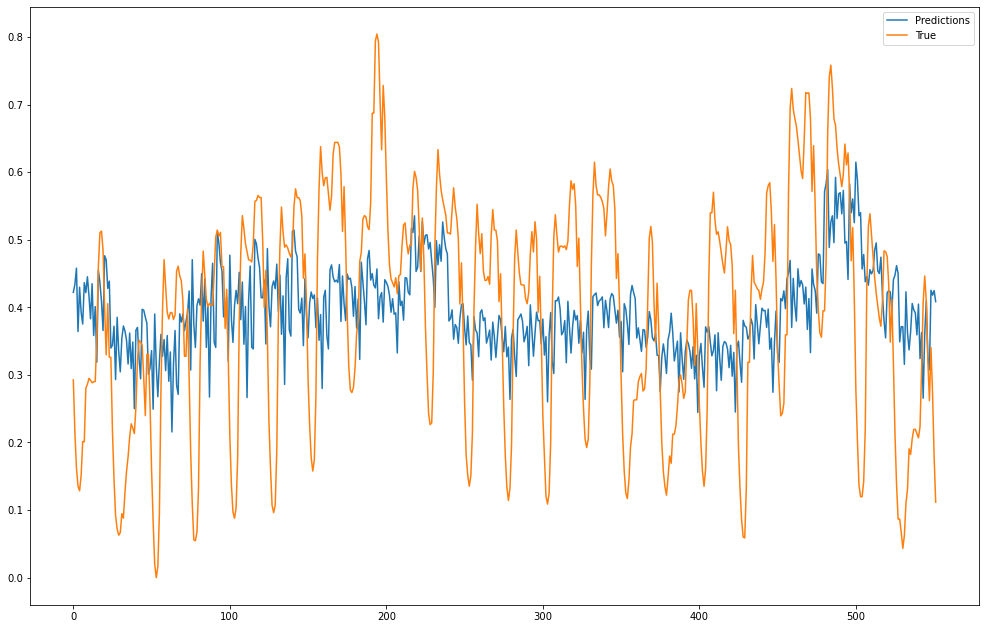

In [1]:
# Tehtävän toteutus
import pandas as pd
# Käytetään parse_dates parametriä luomaan yksi aikaleima sarake "Vuosi", "Kk", "Pv" ja "Klo" sarakkeista
df1 = pd.read_csv('c:/data/lampotila_2010.csv',parse_dates=[['Vuosi','Kk','Pv','Klo']])
df1 = df1.rename(columns={'Vuosi_Kk_Pv_Klo':'date','Ilman lämpötila (degC)':'Temperature'})
df1 = df1[['date','Temperature']]
data_2010 = df1

df2 = pd.read_csv('c:/data/sahkonkulutus_2010.csv')
df2 = df2.rename(columns={'Alkuaika UTC':'date','Sähkön kulutus Suomessa':'Electricity Consumption'})
df2 = df2[['date','Electricity Consumption']]
data_2010['Electricity Consumption'] = df2['Electricity Consumption']

# Käytetään parse_dates parametriä luomaan yksi aikaleima sarake "Vuosi", "Kk", "Pv" ja "Klo" sarakkeista
df3 = pd.read_csv('c:/data/lampotila_2011.csv',parse_dates=[['Vuosi','Kk','Pv','Klo']])
df3 = df3.rename(columns={'Vuosi_Kk_Pv_Klo':'date','Ilman lämpötila (degC)':'Temperature'})
df3 = df3[['date','Temperature']]
data_2011 = df3

df4 = pd.read_csv('c:/data/sahkonkulutus_2011.csv')
df4 = df4.rename(columns={'Lopetusaika UTC':'date','Sähkön kulutus Suomessa':'Electricity Consumption'})
df4 = df4[['date','Electricity Consumption']]
data_2011['Electricity Consumption'] = df4['Electricity Consumption']

# Yhdistetään setit
data = pd.concat([data_2010[['date','Temperature','Electricity Consumption']],data_2011[['date','Temperature','Electricity Consumption']]])
data = data.set_index('date')
data = data.fillna(method='bfill')

# skaalataa arvot
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(data.values)

# Aikasarjaennustamisessa ominaisuudet ovat X tuntia ennen aikaa t ja ennustettavat arvot X tuntia ajan t jälkeen
import numpy as np
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step=False):
    data = []
    labels = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])
    return np.array(data), np.array(labels)

past_history = 24*7 # Ennustetaan viimeisen seitsemän päivän tietojen avulla
future_target = 24 # Ennustetaan seuraavat 24 tuntia
STEP = 1 # Datasetissä on tallennettu havainnot tunnin välein. 
TRAIN_SPLIT = len(dataset) // 2 # Jaetaan datasetti kahteen, vuosi 2010 koulutusdataksi ja 2011 testidataksi
train_X, train_y = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
test_X, test_y = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)
#print(train_X.shape)
#print(train_y.shape)
#print(test_X.shape)
#print(test_y.shape)

# Luodaan LSTM - neuroverkko ja koulutetaan se koulutusdatalla.
import tensorflow as tf
input_layer = tf.keras.Input(shape=(train_X.shape[1],train_X.shape[2])) # muoto on (None, 168, 2)
lstm1 = tf.keras.layers.LSTM(128,return_sequences=True,activation='relu')(input_layer)
lstm2 = tf.keras.layers.LSTM(64,activation='relu')(lstm1)
drop1 = tf.keras.layers.Dropout(0.3)(lstm2)
lstm3 = tf.keras.layers.Dense(1,activation='linear')(drop1)
out = tf.keras.layers.Dense(future_target, activation='linear')(drop1)
model = tf.keras.Model(inputs=input_layer,
                       outputs=out)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='mse',metrics=['mse','mae'])
model.fit(train_X,train_y,validation_data=(test_X,test_y),epochs=30)

# Luodaan ennustukset testidatalle ja piirretään oikeat arvot sekä ennustetut arvot kuvaajaan.
import matplotlib.pyplot as plt
predictions = model.predict(test_X,verbose=0)
nums_preds = []
nums_real = []
index = 0
# Käydään toistorakenteessa läpi ennustukset
for x in range(len(predictions) // len(predictions[0])):
    for num in predictions[index]:
        nums_preds.append(num)
    for num in test_y[index]:
        nums_real.append(num)
    # Siirrytään 24 tuntia eteenpäin, kun sekvenssi oikeista arvoista ja ennustetuista arvoista on lisätty listaan
    index += len(predictions[index]) - 1
fig, ax = plt.subplots(figsize=(17,11))
ax.plot(nums_preds,label='Predictions')
ax.plot(nums_real,label='True')
ax.legend()
plt.show()


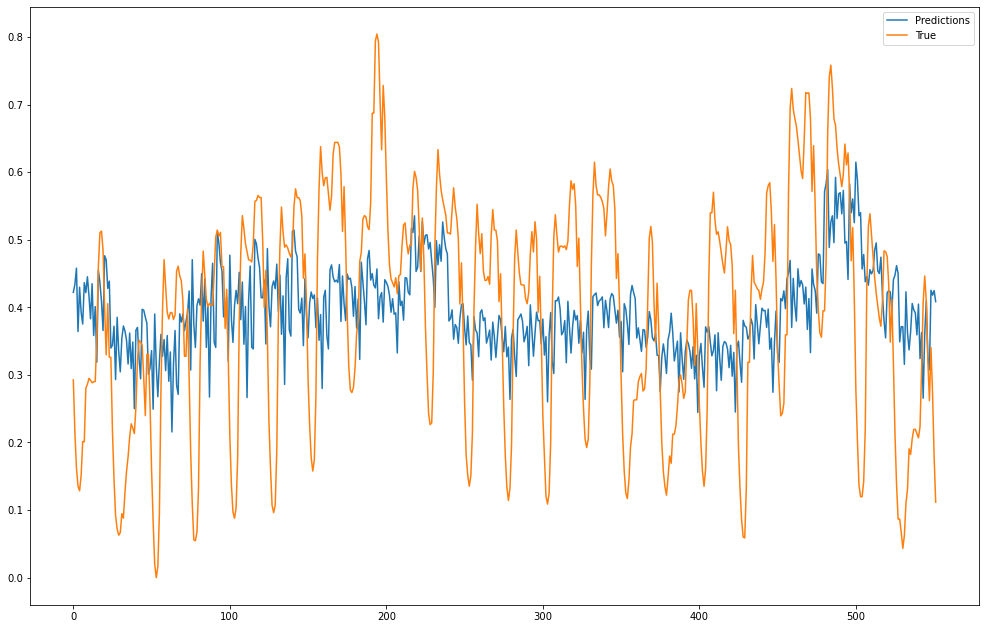

In [2]:
# Tehtävän vastaukset.  Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Luo tarvittavat osat viivakaavioon fig - muuttujaan matplotlib - kirjastoa käyttäen. Tuloksena pitäisi olla viivakaavio, jossa on piirrettynä oikeat arvot ja neuroverkon ennustukset.
fig

# Tehtävä 3.
### Aihe: Autoenkooderit - Poikkeaman tunnistus 
2,5 pistettä

Credit card fraud - datasetissä on 28 anonymisoitua muuttujaa, jonka perusteella voi arvioida, onko luottokorttitapahtuma aito vai huijaus, joka on myös datasetissä jokaiselle tapahtumalle luokiteltu.

1. Lataa luottokorttihuijaus datasetti Kagglesta https://www.kaggle.com/mlg-ulb/creditcardfraud tai jos sinulla ei ole Kaggle tunnusta: https://student.labranet.jamk.fi/~korpjo/files/credit-card-fraud-detection.zip
2. Jaa datasetti koulutus- ja testidatasettiin
3. Luo autoenkooderimalli, jossa sisääntulevasta luottokorttitapahtumatiedoista tiivistetään pienin mahdollinen esitys, ja esitys luodaan takaisin luottokorttitapahtumatiedoksi
4. Määritä koulutusdatan avulla raja-arvo virheelle, minkä ylittävät tapahtumat luokitellaan luottokorttihuijauksiksi
5. Tutki numeerisesti tai visuaalisesti, kuinka hyvin raja-arvolla tunnistetaan poikkeamat testidatasetistä

Vinkkejä:
* Datasetissä on erittäin vähän poikkeamia oikeisiin tapahtumiin verrattuna. Käytä train_test_split funktion 'stratify' parametriä, jotta saat koulutus- ja testidatasetteihin oikean suhteen oikeita ja poikkeavia tapahtumia.
* Viimeisessä kohdassa voit joko visualisoida poikkeamia Autoenkooderi - materiaalien tapaan kuvaajalla tai luomalla [sekaannusmatriisin](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) autoenkooderin ennusteista.

In [10]:
# Tehtävän toteutus
# Lataa luottokorttihuijaus datasetti
import pandas as pd
df = pd.read_csv('c:/data/creditcard.csv')
#print(df)
#df = df.drop(columns=['Time'], axis=1)
#clss = df['Class']
df = df.drop(columns=['Time','Amount','Class'], axis=1)

# Jaa datasetti koulutus- ja testidatasettiin
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)#, stratify=clss)

# skaalataan arvot
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

import tensorflow as tf
# Luo autoenkooderimalli, jossa sisääntulevasta luottokorttitapahtumatiedoista tiivistetään pienin mahdollinen esitys,
features = train.shape[1] # Kuinka monta saraketta datasetissä
input_layer = tf.keras.Input(shape=(features,))
encoder = tf.keras.layers.Dense(7,activation='relu')(input_layer) # Enkooderi, antaa ulos pienemmän esityksen syötteestä, eli vektori z aiemmassa kuvatussa pullonkaulassa
decoder = tf.keras.layers.Dense(features, activation='sigmoid')(encoder) # Dekooderi
autoencoder = tf.keras.Model(inputs=input_layer,
                             outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='mean_squared_error')
autoencoder.fit(train, train,epochs=20,batch_size=4)

import numpy as np
test_predictions = autoencoder.predict(test[0:10])
mse_test = np.mean((test[0:10] - test_predictions)**2)
print(mse_test)

train_predictions = autoencoder.predict(train[0:10])
mse_train = np.mean((train[0:10] - train_predictions)**2)
print(mse_train)


Epoch 1/20
49841/49841 [==============================] - 21s 425us/step - loss: 0.0016
Epoch 2/20
49841/49841 [==============================] - 21s 429us/step - loss: 0.0013
Epoch 3/20
49841/49841 [==============================] - 22s 444us/step - loss: 0.0013
Epoch 4/20
49841/49841 [==============================] - 22s 439us/step - loss: 0.0013
Epoch 5/20
49841/49841 [==============================] - 22s 447us/step - loss: 0.0013
Epoch 6/20
49841/49841 [==============================] - 22s 434us/step - loss: 0.0013
Epoch 7/20
49841/49841 [==============================] - 22s 434us/step - loss: 0.0013
Epoch 8/20
49841/49841 [==============================] - 22s 437us/step - loss: 0.0013
Epoch 9/20
49841/49841 [==============================] - 22s 445us/step - loss: 0.0013
Epoch 10/20
49841/49841 [==============================] - 22s 437us/step - loss: 0.0013
Epoch 11/20
49841/49841 [==============================] - 21s 425us/step - loss: 0.0013
Epoch 12/20
49841/49841 [=====

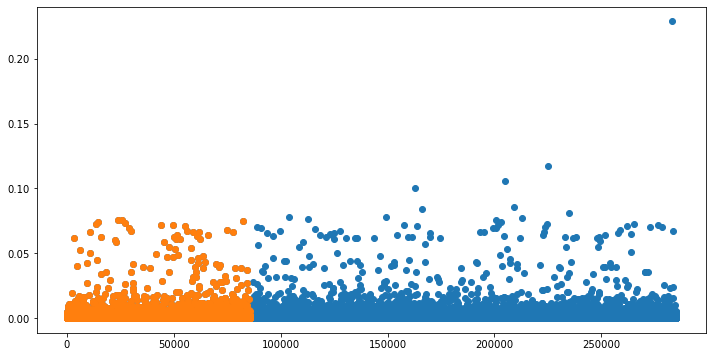

In [9]:
# Tehtävän vastaukset. Käytä visualisaatiota tai osoita numeerisesti, kuinka monta poikkeamaa neuroverkkomalli huomasi.
import matplotlib.pyplot as plt
test_predictions = autoencoder.predict(test)
mse_test = np.mean((test - test_predictions)**2,axis=1)
trained_predictions = autoencoder.predict(train)
mse_trained = np.mean((train - trained_predictions)**2,axis=1)
predictions_mse = np.concatenate([mse_test,mse_trained]) # Yhdistetään ennustukset yhteen taulukkoon kuvaajaa varten
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(range(len(predictions_mse)),predictions_mse)
ax.scatter(range(len(mse_test)),mse_test)

# 1-4 poikkeamaa / tai riippuu, miten tulkitaan ja mihin raja vedetään

# Tehtävä 4.
### Aihe: Autoenkooderit - Kohinan poisto kuvasta
2,5 pistettä

Alla on luotu MNIST datasetistä "korruptoitunut" versio, jossa kuviin on lisätty kohinaa. Luo autoenkooderi, jolle syötetään suttuinen numero ja joka luo kuvan uudestaan puhtaana numerona.

Todista autoenkooderin toiminta:
1. Piirrä Matplotlibillä testidatasetistä suttuinen kuva (esim. test_X_noisy[10])
2. Syötä suttuinen kuva autoenkooderille.
3. Piirrä autoenkooderin ulostulona antama kuva.
4. Aja "Tehtävän vastaukset" solu

Vinkkejä:
* Mieti, mikä muuttuja menee syötteenä autoenkooderiin ja mikä muuttuja on haluttu lopputulos?
    * Suttuinen kuva -> autoenkooderi -> Selkeä kuva
* Piirrät kuvat käyttäen matplotlib - kirjastoa
    * Autoenkooderi materiaaleissa esimerkki

In [1]:
# Ladataan tarvittavat kirjastot
import tensorflow as tf
import numpy as np
# Puhdas MNIST datasetti, josta otetaan kymmenesosa kuvista datasettiin
(train_X, _), (test_X, _) = tf.keras.datasets.mnist.load_data()
train_X, test_X = train_X[0:len(train_X) // 10], test_X[0:len(test_X) // 10]
train_X, test_X = train_X / 255.0, test_X / 255.0
train_X, test_X = train_X.reshape((train_X.shape[0],28,28,1)), test_X.reshape((test_X.shape[0],28,28,1))

# Luodaan suttuisia kuvia MNIST datasetistä laittamalla kuviin kohinaa
noise = np.random.normal(loc=0.5, scale=0.75, size=train_X.shape)
train_X_noisy = train_X + noise
noise = np.random.normal(loc=0.5, scale=0.75, size=test_X.shape)
test_X_noisy = test_X + noise
train_X_noisy = np.clip(train_X_noisy, 0., 1.) 
test_X_noisy = np.clip(test_X_noisy, 0., 1.)

Epoch 1/5
375/375 [==============================] - 4s 11ms/step - loss: 0.0939
Epoch 2/5
375/375 [==============================] - 4s 11ms/step - loss: 0.0677
Epoch 3/5
375/375 [==============================] - 4s 11ms/step - loss: 0.0673
Epoch 4/5
375/375 [==============================] - 4s 11ms/step - loss: 0.0650
Epoch 5/5
375/375 [==============================] - 4s 11ms/step - loss: 0.0516


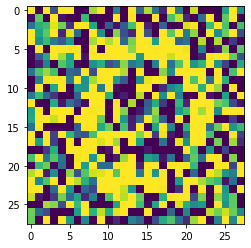

In [2]:
# Tehtävän toteutus
# Luodaan enkooderi
enc_input = tf.keras.Input(shape=(28,28,1))
enc_conv1 = tf.keras.layers.Conv2D(filters=32,kernel_size=3,strides=(2,2),activation='relu')(enc_input)
enc_conv2 = tf.keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),activation='relu')(enc_conv1)
# luodaan tiivistetty luonnos kuvasta Flatten() ja Dense kerroksella,
enc_flatten = tf.keras.layers.Flatten()(enc_conv2)
# Viimeisessä Dense kerroksessa luodaan ennuste kuvasta, laitetaan aktivaatiofunktioksi 'linear'
enc_out = tf.keras.layers.Dense(64,activation='linear')(enc_flatten)
encoder = tf.keras.Model(inputs=enc_input,
                         outputs=enc_out,
                         name='Encoder')
#encoder.summary()

# Luodaan dekooderi. Dekooderin tehtävä on luoda tiivistetty enkooderin tieto takaisin kuvaksi.
dec_input = tf.keras.Input(shape=(64,))
dec_dense1 = tf.keras.layers.Dense(7*7*64,activation='relu')(dec_input)
dec_reshape = tf.keras.layers.Reshape(target_shape=(7,7,64))(dec_dense1)
# Conv2DTranspose kerroksella pienempi sisääntulo muutetaan suuremmaksi sisääntuloksi (dekonvoluutio)
dec_convt1 = tf.keras.layers.Conv2DTranspose(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu')(dec_reshape)
dec_convt2 = tf.keras.layers.Conv2DTranspose(filters=32,kernel_size=3,strides=(2,2),padding='same',activation='relu')(dec_convt1)
dec_out = tf.keras.layers.Conv2DTranspose(filters=1,kernel_size=3,strides=(1,1),padding='same',activation="sigmoid")(dec_convt2)
decoder = tf.keras.Model(inputs=dec_input,
                         outputs=dec_out,
                         name='Decoder')
#decoder.summary()

# Yhdistetään luodut enkooderi ja dekooderi mallit autoenkooderilla. 
autoencoder_input = tf.keras.Input(shape=(28,28,1),name='Autoencoder_input')
encoder_out = encoder(autoencoder_input)
decoder_out = decoder(encoder_out)
autoencoder = tf.keras.Model(inputs=autoencoder_input, 
                             outputs=decoder_out,
                             name='Autoencoder')
#autoencoder.summary()

# Autoenkooderille annetaan ominaisuuksina train_X_noisy ja ennustettavana train_X.
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001),
                    loss = 'mean_squared_error')
autoencoder.fit(train_X_noisy,train_X, epochs=5, batch_size=16)

# Todista autoenkooderin toiminta:
# Piirrä Matplotlibillä testidatasetistä suttuinen kuva (esim. test_X_noisy[10])
# Syötä suttuinen kuva autoenkooderille.
# Piirrä autoenkooderin ulostulona antama kuva.

# Piirretään testikuva
import matplotlib.pyplot as plt
test_img = test_X_noisy[10]
test_img = test_img.reshape(test_img.shape[0],test_img.shape[1])
plt.imshow(test_img)
plt.show()

# Luodaan aikaisemmasta testikuvasta autoenkooderilla kuva uudelleen.
test_img = test_img.reshape(1,28,28,1)
prediction = autoencoder.predict(test_img)
prediction = prediction.reshape(prediction.shape[1],prediction.shape[2])
#plt.imshow(prediction)
#plt.show()
cleaned_img = prediction

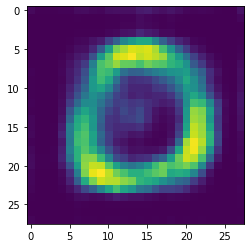

In [3]:
# Tehtävän vastaukset.  Huom! Älä muokkaa tätä solua, vaan aja se, kun olet suorittanut tehtävän. 
# Syötä cleaned_img - muuttujaan autoenkooderin ulostulo. Muista muokata sitä ennen ulostulo takaisin 28x28 matriisiksi, jotta sen voi syöttää plt.imshow() funktiolle.
plt.imshow(cleaned_img)

# Extra Tehtävä
### Aihe: Twiitin klassifiointi - Positiivinen vai negatiivinen?
2,5 pistettä

Tämä on ylimääräinen tehtävä, jonka avulla voit saada muutaman lisäpisteen.

Lataa datasetti osoitteesta https://student.labranet.jamk.fi/~korpjo/files/Sentiment-Analysis-Dataset.zip. Datasetissä on twiittejä, jotka on leimattu positiiviseksi (1) tai negatiiviseksi (0) Sentiment - sarakkeessa.

Twiiteissä on paljon turhaa tavaraa, kuten linkkejä ja viittauksia muihin käyttäjiin @ - merkillä, jotka eivät auta tai haittaavat neuroverkkoja klassifioimaan twiittejä. Muokkaa datasettiä ja luo neuroverkkomalli, joka ennustaa, onko twiitti positiivinen vai negatiivinen. 

Jaa data koulutus- ja testidataan (80% koulutusdataa 20% testidataa jako) ja mittaa kuinka tarkka mallisi on testidatan avulla.

Vinkkejä:
* Tekstin esikäsittelyyn voi käyttää esim. TensorFlowin Tokenizer - luokkaa: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
* Viittauksia ja linkkejä ei välttämättä tarvitse poistaa, vaan ne voi korvata yleisesti jollakin merkkijonolla. Esim. "http://iltalehti.fi" -> "link_to_website" tai "@elonmusk" -> "reference_to_user"

In [ ]:
# Tehtävän toteutus